# Load the data
You first start with importing all the required modules like numpy, matplotlib and most importantly Tensorflow.

In [7]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" #for training on gpu

# After importing all the modules you will now learn
how you can load data in TensorFlow, which should be pretty straightforward. 
The only thing that you should take into account is the one_hot=True argument, 
which you'll also find in the line of code below: it converts the categorical 
class labels to binary vectors.
In one-hot encoding, you convert the categorical data into a vector of numbers. You do this
because machine learning algorithms can't work with categorical data directly. Instead, you generate
one boolean column for each category or class. Only one of these columns could take on the value 
1 for each sample. That explains the term "one-hot encoding".

But what does such a one-hot encoded data column look like?

For your problem statement, the one hot encoding will be a row vector, and for each image, 
it will have a dimension of 1 x 10. It's important to note here that the vector consists of 
all zeros except for the class that it represents. There, you'll find a 1. For example, 
the ankle boot image that you plotted above has a label of 9, so for all the ankle boot 
images, the one hot encoding vector would be [0 0 0 0 0 0 0 0 0 1].

Now that all of this is clear, it's time to import the data!

In [8]:
data = input_data.read_data_sets('data/fashion',one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/fashion/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


# Once you have the training and testing data loaded, 
you're all set to analyze the data in order to get some intuition about the dataset
that you are going to work with for this tutorial!

# Analyze the Data
Before you start any heavy lifting, it's always a good idea to check out what the images
in the dataset look like. First, you can take a programmatical approach and check out their
dimensions. Also, take into account that if you want to explore your images, 
these have already been rescaled between 0 and 1. That means that you would not 
need to rescale the image pixels again!

In [9]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=data.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=data.train.labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=data.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=data.test.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


# From the above output, you can see that the training 
data has a shape of 55000 x 784: there are 55,000 training samples each of 784-dimensional
vector. Similarly, the test data has a shape of 10000 x 784, since there are 10,000 
testing samples.

The 784 dimensional vector is nothing but a 28 x 28 dimensional matrix. 
That's why you will be reshaping each training and testing sample from a 784 dimensional
vector to a 28 x 28 x 1 dimensional matrix in order to feed the samples in to the CNN model.

For simplicity, let's create a dictionary that will have class names with their 
corresponding categorical class labels.

In [10]:
# Create dictionary of target classes
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

# Also, let's take a look at the images in your dataset: 

Text(0.5,1,'(Label: Sneaker)')

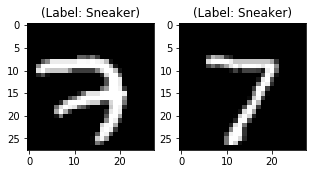

In [11]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(data.train.images[0], (28,28))
curr_lbl = np.argmax(data.train.labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(data.test.images[0], (28,28))
curr_lbl = np.argmax(data.test.labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# The output of above two plots are one of the sample 
images from both training and testing data, and these images are assigned a class 
label of 4 (Coat) and 9 (Ankle boot). Similarly, other fashion products will have 
different labels, but similar products will have same labels. This means that all the 
6,500 ankle boot images will have a class label of 9.

# Data Preprocessing

The images are of size 28 x 28 (or a 784-dimensional vector).

The images are already rescaled between 0 and 1 so you don't need to 
rescale them again, but to be sure let's visualize an image from training dataset 
as a matrix. Along with that let's also print the maximum and minimum value of the matrix.

In [12]:
data.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/home/wazir/.virtualenvs/cv/local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
np.max(data.train.images[0])

0.9960785

In [14]:
np.min(data.train.images[0])

0.0

In [15]:
# Reshape training and testing image
train_X = data.train.images.reshape(-1, 28, 28, 1)
test_X = data.test.images.reshape(-1,28,28,1)

In [16]:
train_X.shape, test_X.shape

((55000, 28, 28, 1), (10000, 28, 28, 1))

In [17]:
train_y = data.train.labels
test_y = data.test.labels

In [18]:
train_y.shape, test_y.shape

((55000, 10), (10000, 10))

# The Deep Neural Network

You'll use three convolutional layers:

The first layer will have 32-3 x 3 filters,
The second layer will have 64-3 x 3 filters and
The third layer will have 128-3 x 3 filters.

In addition, there are three max-pooling layers each of size 2 x 2.

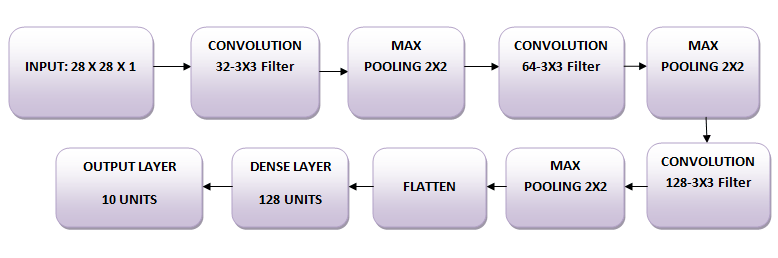

In [20]:
from IPython.display import Image
Image('A.png')

In [21]:
training_iters = 200 
learning_rate = 0.001 
batch_size = 128

# Network Parameters

Next, you need to define the network parameters. Firstly, you define the number of inputs. 
This is 784 since the image is initially loaded as a 784-dimensional vector. Later, you will 
see that how you will reshape the 784-dimensional vector to a 28 x 28 x 1 matrix. Secondly, 
you'll also define the number of classes, which is nothing else than the number of class labels.

In [22]:
# MNIST data input (img shape: 28*28)
n_input = 28

# MNIST total classes (0-9 digits)
n_classes = 10

In [24]:
#both placeholders are of type float
x = tf.placeholder("float", [None, 28,28,1]) #INPUT DIMENSION
y = tf.placeholder("float", [None, n_classes])#OUTPUT DIMENSION

# Creating wrappers for simplicity

In your network architecture model, you will have multiple convolution and max-pooling layers. 
In such cases, it's always a better idea to define convolution and max-pooling functions, so 
that you can call them as many times you want to use them in your network.

    In the conv2d() function you pass 4 arguments:
    input x, weights W, bias b and strides. 
    This last argument(stride) is by default set to 1, but you can always play with it to see how the network performs. 
    
    The first and last stride must always be 1, because the first is for the image-number and the last is for the input-channel (since the image is a gray-scale image which has only one channel). 
    
    After applying the convolution, you will add bias and apply an activation function that is called Rectified Linear Unit (ReLU).
    
    The max-pooling function is simple: it has the input x and a kernel size k, which is set to be 2. This means that the max-pooling filter will be a square matrix with dimensions 2 x 2 and the stride by which the filter will move in is also 2.

You will padding equal to same which ensures that while performing the convolution operations, the boundary pixels of the image are not left out, so padding equal to same will basically adds zeros at the boundaries of the input and allow the convolution filter to access the boundary pixels as well.

Similarly, in max-pooling operation padding equal to same will add zeros. Later, when you will define the weights and the biases you will notice that an input of size 28 x 28 is downsampled to 4 x 4 after applying three max-pooling layers.

In [26]:
#x = input
#W = weight
#b = biases
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) 

#x is input and k is kernel size which is 2 means 2x2 , becasue maxpooling make square dimension
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')


# After you have defined the conv2d and maxpool2d 
wrappers, now you can now define your weights and biases variables. So, let's get started!

But first, let's understand each weight and bias parameter step by step. You will create two dictionaries, one for weight and the second for the bias parameter.

    If you can recall from the above figure that the first convolution layer has 32-3x3 filters, so the first key (wc1) in the weight dictionary has an argument shape that takes a tuple with 4 values: the first and are the filter size, while the third is the number of channels in the input image and the last represents the number of convolution filters you want in the first convolution layer. The first key in biases dictionary, bc1, will have 32 bias parameters.

    Similarly, the second key (wc2) of the weight dictionary has a shape parameter that will take a tuple with 4 values: the first and second again refer to the filter size, and the third represents the number of channels from the previous output. Since you pass 32 convolution filters on the input image, you will have 32 channels as an output from the first convolution layer operation. The last represents the number of filters you want in the second convolution filter. Note that the second key in biases dictionary, bc2, will have 64 parameters.

You will do the same for the third convolution layer.

    Now, it's important to understand the fourth key (wd1). After applying 3 convolution and max-pooling operations, you are downsampling the input image from 28 x 28 x 1 to 4 x 4 x 1 and now you need to flatten this downsampled output to feed this as input to the fully connected layer. That's why you do the multiplication operation $44128$, which is the output of the previous layer or number of channels that are outputted by the convolution layer 3. The second element of the tuple that you pass to shape has number of neurons that you want in the fully connected layer. Similarly, in biases dictionary, the fourth key bd1 has 128 parameters.

You will follow the same logic for the last fully connected layer, in which the number of neurons will be equivalent to the number of classes. 

# The Deep Neural Network

You'll use three convolutional layers:

The first layer will have 32-3 x 3 filters, The second layer will have 64-3 x 3 filters and The third layer will have 128-3 x 3 filters.

In addition, there are three max-pooling layers each of size 2 x 2.

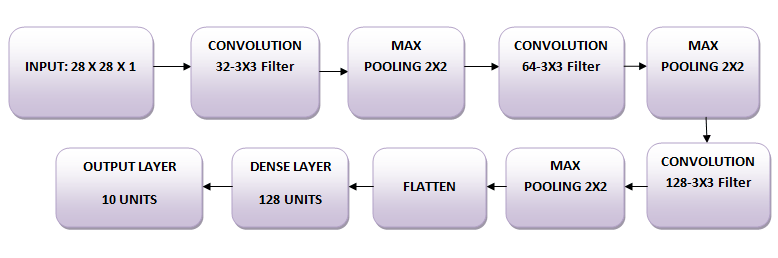

In [28]:
from IPython.display import Image
Image('A.png')

In [34]:
#FIRST CONVOLUTION LAYER
#shape = (size, I/P, No:of filters) = (3,3,1,32) = first layer size 3x3, I/P 1 Ychannel, No: of filters =32


#SECOND CONVOLUTION LAYER
#shape = (size, I/P, No:of filters) = (3,3,32,64) = 2nd layer size 3x3, I/P 32 coming from previous layer 
                                                        #No:filters = 64

#THIRD CONVOLUTION LAYER
#shape = (size, I/P, No:of filters) = (3,3,64,128) = first layer size 3x3, I/P 1 Ychannel, No: of filters =32

#DENSE LAYER
# shape=(4*4*128,128), Because we use max-pooling operations, so you are downsampling the 
#input image from 28 x 28 x 1 to 4 x 4 x 1 

#OUTPUT LAYER
#shape=(128,n_classes) = (128, 10)
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'wd1': tf.get_variable('W3', shape=(4*4*128,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()), 
}

#EXPLAIN BIASES
#BIASES = No: Filters
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(10), initializer=tf.contrib.layers.xavier_initializer()),
}

# Now, it's time to define the network architecture! Unfortunately, 
# this is not as simple as you do it in the Keras framework!

The conv_net() function takes 3 arguments as an input: the input x and the weights and biases dictionaries. Again, let's go through the construction of the network step by step:

    Firstly, you reshape the 784-dimensional input vector to a 28 x 28 x 1 matrix. As you had seen earlier, the images are loaded as a 784-dimensional vector but you will feed the input to your model

as a matrix of size 28 x 28 x 1. The -1 in the reshape() function means that it will infer the first dimension on its own but the rest of the dimension are fixed, that is, 28 x 28 x 1.
Next, as shown in the figure of the architecture of the model, you will define conv1 which takes input as an image, weights wc1 and biases bc1. Next, you apply max-pooling on the output of conv1 and you will basically perform a process analogous to this until conv3.
Since your task is to classify, given an image it belongs to which class label. So, after you pass through all the convolution and max-pooling layers, you will flatten the output of conv3. Next, you'll connect the flattened conv3 neurons with each and every neuron in the next layer. Then you will apply activation function on the output of the fully connected layer fc1.
Finally, in the last layer, you will have 10 neurons since you have to classify 10 labels. That means that you will connect all the neurons of fc1 in the output layer with 10 neurons in the last layer. 

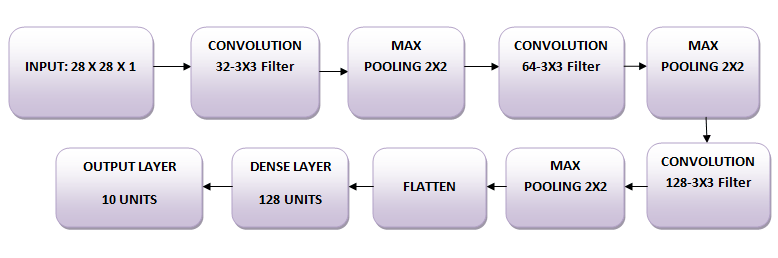

In [35]:
from IPython.display import Image
Image('A.png')

In [36]:
def conv_net(x, weights, biases):  

    # here we call the conv2d function we had defined above and pass the input image x, weights wc1 and bias bc1.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 14*14 matrix.
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    # here we call the conv2d function we had defined above and pass the input image x, weights wc2 and bias bc2.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 7*7 matrix.
    conv2 = maxpool2d(conv2, k=2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 4*4.
    conv3 = maxpool2d(conv3, k=2)


    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

# Loss and Optimizer Nodes

You will start with constructing a model and call the conv_net() function by passing in input x, weights and biases. Since this is a multi-class classification problem, you will use softmax activation on the output layer. This will give you probabilities for each class label. The loss function you use is cross entropy.

The reason you use cross entropy as a loss function is because the cross-entropy function's value is always positive, and tends toward zero as the neuron gets better at computing the desired output, y, for all training inputs, x. These are both properties you would intuitively expect for a cost function. It avoids the problem of learning slowing down which means that if the weights and biases are initialized in a wrong fashion even then it helps in recovering faster and does not hamper much the training phase.

In TensorFlow, you define both the activation and the cross entropy loss functions in one line. You pass two parameter
s which are the predicted output and the ground truth label y. You will then take the mean (reduce_mean) over all the batches to get a single loss/cost value.

Next, you define one of the most popular optimization algorithms: the Adam optimizer. You can read more about the optimizer from here and you specify the learning rate with explicitly stating minimize cost that you had calculated in the previous step.

In [37]:
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



# Evaluate Model Node

To test your model, let's define two more nodes: correct_prediction and accuracy. It will evaluate your model after every training iteration which will help you to keep track of the performance of your model. Since after every iteration the model is tested on the 10,000 testing images, it will not have seen in the training phase.

You can always save the graph and run the testing part later as well. But for now, you will test within the session.

In [38]:
#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Remember that your weights and biases are variables and that you have to initialize them before you can make use of them. So let's do that with the following line of code:

In [39]:
# Initializing the variables
init = tf.global_variables_initializer()

# Training and Testing the Model

When you train and test your model in TensorFlow, you go through the following steps:

    You start off with launching the graph. This is a class that runs all the TensorFlow operations and launches the graph in a session. All the operations have to be within the indentation.
    Then, you run the session, which will execute the variables that were initialized in the previous step and evaluates the tensor.
    Next, you define a for loop that runs for the number of training iterations you had specified in the beginning. Right after that, you'll initiate a second for loop, which is for the number of batches that you will have based on the batch size you chose, so you divide the total number of images by the batch size.
    You will then input the images based on the batch size you pass in batch_x and their respective labels in batch_y.
    Now is the most important step. Just like you ran the initializer after creating the graph, now you feed the placeholders x and y the actual data in a dictionary and run the session by passing the cost and the accuracy that you had defined earlier. It returns the loss (cost) and accuracy.
    You can print the loss and training

    accuracy after each epoch (training iteration) is completed.

After each training iteration is completed, you run only the accuracy by passing all the 10000 test images and labels. This will give you an idea of how accurately your model is performing while it is training.

It's usually recommended to do the testing once your model is trained completely and validate only while it is in training phase after each epoch. However, let's stick with this approach for now

In [40]:
with tf.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(training_iters):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        print("Iter " + str(i) + ", Loss= " + \
              

        "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc))
        print("Optimization Finished!")

        # Calculate accuracy for all 10000 mnist test images
        test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X,y : test_y})
        train_loss.append(loss)
        test_loss.append(valid_loss)
        train_accuracy.append(acc)
        test_accuracy.append(test_acc)
        print("Testing Accuracy:","{:.5f}".format(test_acc))
    summary_writer.close()

KeyboardInterrupt: 

# he test accuracy looks impressive. It turns out that your classifier does better than the benchmark that was reported here, which is an SVM classifier with mean accuracy of 0.897. Also, the model does well compared to some of the deep learning models mentioned on the GitHub profile of the creators of fashion-MNIST dataset.

However, you saw that the model looked like it was overfitting since the training accuracy is more than the testing accuracy. Are these results really all that good?

Let's put your model evaluation into perspective and plot the accuracy and loss plots between training and validation data:

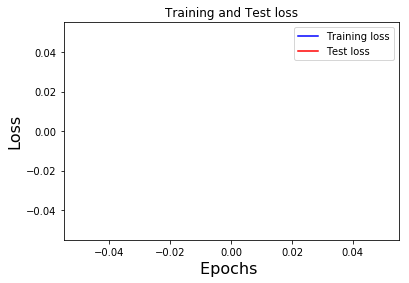

<Figure size 432x288 with 0 Axes>

In [41]:
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

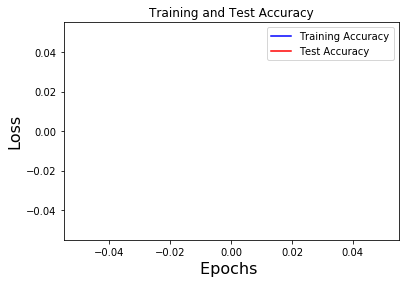

<Figure size 432x288 with 0 Axes>

In [42]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

# From the above two plots, you can see that the test
accuracy almost became stagnant after 50-60 epochs and rarely increased at certain epochs. In the beginning, the validation accuracy was linearly increasing with loss, but then it did not increase much.

The validation loss shows that this is the sign of overfitting, similar to test accuracy it linearly decreased but after 25-30 epochs, it started to increase. This means that the model tried to memorize the data and succeeded.

This was it for this tutorial, but there is a task for you all:

    Your task is to reduce the overfitting of the above model, by introducing dropout technique. For simplicity, you may like to follow along with the tutorial Convolutional Neural Networks in Python with Keras, even though it is in keras, but still the accuracy and loss heuristics are pretty much the same. So, following along with this tutorial will help you to add dropout layers in your current model. Since, both of the tutorial have exactly similar architecture.
    Secondly, try to improve the testing accuracy, may be by deepening the network a bit, or adding learning rate decay for faster convergence, or try playing with the optimizer and so on!
